In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [2]:
import sys
sys.path.insert(0, "../../code-previous")

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import time
import os

import operator

import string
import swifter
import nltk
stopwords = nltk.corpus.stopwords.words('english')


import plotly
import plotly.plotly as py
from plotly import tools

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import CountVectorizer


from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

In [4]:
data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/all_discipline_data.pql"
data = pd.read_pickle(data_path)

In [5]:
data50 = data[data.PubYear == 1950]

In [6]:
data50_group = data50[["Label","title_without_stopwords"]].groupby(data50.Label)["title_without_stopwords"].apply(list)

data50_group = pd.DataFrame(data50_group)

In [7]:
data50_group["title_words"] = data50_group["title_without_stopwords"].apply(lambda x: " ".join(x))

In [36]:
data50_group.iloc[449]

title_without_stopwords    [diffraction pattern circular aperture measure...
title_words                diffraction pattern circular aperture measured...
Name: Physics, Applied, dtype: object

In [20]:
len(list(data50_group.index))

613

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, min_df=5, stop_words='english')
tf_idf_matrix = vectorizer.fit_transform(data50_group.title_words)

num_samples, num_features = tf_idf_matrix.shape
print("num_samples", num_samples)
print("num_features", num_features)

num_samples 613
num_features 23816


In [70]:
max(vectorizer.idf_)

5.628235458919088

In [71]:
#tf_idf_vocab = {value:key for key,value in vectorizer.vocabulary_}
#tf_idf_vocab
tfidf_rev_dict = {value:key for key,value in vectorizer.vocabulary_.items()}
words = [tfidf_rev_dict[i] for i in range(len(vectorizer.idf_))]

In [72]:
# consider one discipline - Applied Physics index 449

# get tf scores of all the words of applied physics
tf_applied_physics = tf_idf_matrix[450:451,:].todense().reshape(-1,).tolist()[0]
idf_words = vectorizer.idf_

#tf_idf_physics = [(tf_applied_physics[i], idf_words[i]) for i in range(len(idf_words))]

trace0 = go.Scatter(
    x = tf_applied_physics,
    y = idf_words,
    mode = 'markers',
    text = words
)


layout= go.Layout(
    title= 'Document Frequency - Inverse Document Frequency plot ',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Document Frequency',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Inverse Document Frequency',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

plotdata = [trace0]


fig= go.Figure(data=plotdata, layout=layout)
py.iplot(fig)

#py.iplot(plotdata, filename='scatter-mode')

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



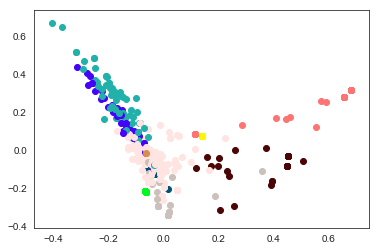

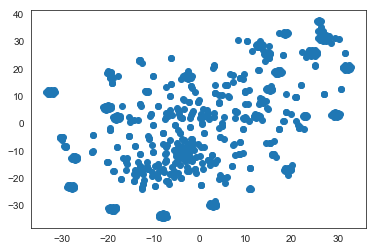

In [17]:
# https://www.scikit-yb.org/en/latest/api/text/tsne.html

# https://stackoverflow.com/questions/27494202/how-do-i-visualize-data-points-of-tf-idf-vectors-for-kmeans-clustering

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2


clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(vectorized_words)
# print labels

X = tf_idf_matrix.todense()

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()